Generate a water density plane plot.

Continued from `p2021-0421_wdens_Zplane.ipynb`, and also borrowing from:

- zeolites repo: `p2021-0918b_wdens_bigplot.ipynb`


## Setup

In [1]:
import os

In [2]:
import os.path as osp

In [3]:
import numpy as np

In [4]:
from datetime import datetime

In [5]:
import matplotlib.pyplot as plt

In [6]:
from matplotlib.colors import BoundaryNorm

In [7]:
%matplotlib inline

In [8]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 300

In [9]:
import pandas as pd

In [10]:
import simproc

In [11]:
import simproc.requesthandler.yaml_manager as yaml_manager
import simproc.requesthandler.pickle_manager as pickle_manager
import simproc.requesthandler.locators as locators
from simproc.requesthandler.nested import get_nested

## Output plot paths

In [12]:
outdir_top="../postproc/from_notebooks"
assert osp.isdir(outdir_top)

In [13]:
datestr=datetime.now().strftime("%Y_%m_%d")
datestr

'2021_09_20'

In [14]:
outdir=osp.join(outdir_top,datestr)

In [15]:
if not osp.isdir(outdir):
  os.makedirs(outdir)
assert osp.isdir(outdir)

## Input file

In [16]:
jobdir=osp.abspath("../jobs/run/wdens_16A")
assert osp.isdir(jobdir)

In [17]:
##densfile="density_Zplane.pkl"
densfile="density_Zplane_2.pkl"

In [18]:
wdens_infile=osp.join(jobdir,densfile)
assert osp.isfile(wdens_infile)

## Read data

In [19]:
wdens_dict=pickle_manager.readfile(wdens_infile)

## Constants and functions for plotting

In [20]:
wd_level_list=[0.0,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25,5.75]
wd_ticks_list=[0.0,0.25,0.75,     1.75,     2.75,     3.75,     4.75,     5.75]

In [21]:
wd_cmap = plt.get_cmap("magma")
wd_norm = BoundaryNorm(wd_level_list, ncolors=wd_cmap.N, extend="max")

In [22]:
axtitle="Water Density"
cbar_label="Water Density [normalized to SPC bulk value]"

In [23]:
plot_path=osp.join(outdir,"wdens_Zplane_16A_revised.png")

In [24]:
def unpack_wdens(wdens_dict):
  return wdens_dict["grid"], wdens_dict["edges"]

In [25]:
def plot_celldata(fig,ax,grid,edges,cmap,norm,cbar_label="",cbar_fontsize=16,ticks=None):
  cntr=ax.pcolormesh(edges[0],edges[1],grid.T,cmap=cmap,norm=norm)
  cbar=fig.colorbar(cntr, ax=ax, ticks=ticks, spacing="proportional")
  cbar.set_label(cbar_label,fontsize=cbar_fontsize)
  o=ax.axis('equal')
  return cntr

## Prep and plot

In [26]:
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

In [27]:
grid,edges=unpack_wdens(wdens_dict)

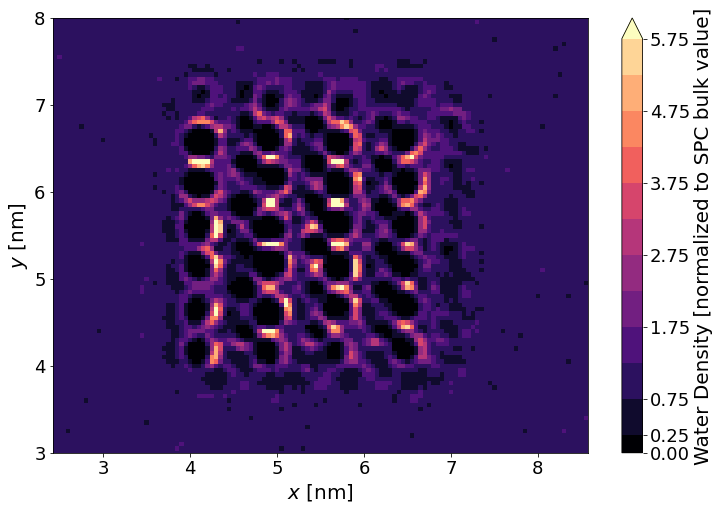

In [28]:
fig,ax = plt.subplots(figsize=(12,8))
o=plot_celldata(fig,ax,grid,edges,cmap=wd_cmap,norm=wd_norm,
                cbar_label=cbar_label,cbar_fontsize=20,ticks=wd_ticks_list)
o=ax.set_xlim(3,8)
o=ax.set_ylim(3,8)
o=ax.set_xlabel('$x$ [nm]', fontsize=20)
o=ax.set_ylabel('$y$ [nm]', fontsize=20)
#Save figure
fig.savefig(str(plot_path),dpi=150)